In [1]:
import os
import ROOT
from itertools import product

Welcome to JupyROOT 6.30/04


In [9]:
ERA = "2016postVFP"
MEASURE = "electron"
isQCD = False

In [10]:
ptCorr_bins = []
abseta_bins = []
if MEASURE == "muon":
    ptCorr_bins = [10., 15., 20., 30., 50., 100.]
    abseta_bins = [0., 0.9, 1.6, 2.4]
elif MEASURE == "electron":
    ptCorr_bins = [10., 15., 20., 25., 35., 50., 100.]
    abseta_bins = [0., 0.8, 1.579, 2.5]
else:
    raise NameError(f"Wrong measure {MEASURE}")

In [11]:
if not isQCD:
    file_path = f"../results/{ERA}/ROOT/{MEASURE}/fakerate.root" 
else:
    file_path = f"../results/{ERA}/ROOT/{MEASURE}/fakerate_qcd.root"
print(file_path)
assert os.path.exists(file_path)
f = ROOT.TFile.Open(file_path)
h = f.Get("fakerate")

for abseta, ptCorr in product(abseta_bins[:-1], ptCorr_bins[:-1]):
    thisbin = h.FindBin(abseta+1e-5, ptCorr+1e-5)
    value, error = h.GetBinContent(thisbin), h.GetBinError(thisbin)
    print(abseta, ptCorr, value, error, error/value*100)

../results/2016postVFP/ROOT/electron/fakerate.root
0.0 10.0 0.5394363525404005 0.03402808377264645 6.308081317174106
0.0 15.0 0.3026402172685919 0.03799791611836348 12.555474768457653
0.0 20.0 0.1955330820218268 0.0295285076304847 15.101540529693343
0.0 25.0 0.1560380125409775 0.027860536331726343 17.85496743904619
0.0 35.0 0.120705024298765 0.02254887494294487 18.680974610578478
0.0 50.0 0.1340967067196113 0.050512688608673535 37.668850969094066
0.8 10.0 0.5840072374414551 0.07167089394293003 12.2722612577408
0.8 15.0 0.3758452463354745 0.029730660697746568 7.910346342709726
0.8 20.0 0.2813833736814967 0.06439171782521706 22.88398101946965
0.8 25.0 0.1820227947101582 0.09119244499526072 50.09946426790661
0.8 35.0 0.1479378903611692 0.028016929873297628 18.938305666586363
0.8 50.0 0.1790418419210045 0.11434804839935926 63.8666622128536
1.579 10.0 0.6225869924632551 0.05025765411720441 8.072390641886178
1.579 15.0 0.398392921183518 0.08060491654519025 20.232517261033347
1.579 20.0 0.256

In [12]:
def setInfoTo(text: ROOT.TLatex):
    text.SetTextSize(0.035)
    text.SetTextFont(42)

def setLogoTo(text: ROOT.TLatex):
    text.SetTextSize(0.04)
    text.SetTextFont(61)
    
def setWorkInProgressTo(text: ROOT.TLatex):
    text.SetTextSize(0.035)
    text.SetTextFont(52)
    
def setExtraInfoTo(text: ROOT.TLatex):
    text.SetTextSize(0.035)
    text.SetTextFont(42)

In [13]:
# prepare canvas and legend
canvas = ROOT.TCanvas("c", "", 1600, 1200)
canvas.SetLeftMargin(0.1)
canvas.SetRightMargin(0.08)
canvas.SetTopMargin(0.1)
canvas.SetBottomMargin(0.12)

legend = ROOT.TLegend(0.67, 0.65, 0.9, 0.85)
legend.SetFillStyle(0)
legend.SetBorderSize(0)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


In [14]:
# prepare histograms
projections = {}
projections["eta1"] = h.ProjectionY(f"eta{str(abseta_bins[0])}to{str(abseta_bins[1])}", 1, 1)
projections["eta2"] = h.ProjectionY(f"eta{str(abseta_bins[1])}to{str(abseta_bins[2])}", 2, 2)
projections["eta3"] = h.ProjectionY(f"eta{str(abseta_bins[2])}to{str(abseta_bins[3])}", 3, 3)

projections["eta1"].SetLineColor(ROOT.kRed)
projections["eta2"].SetLineColor(ROOT.kGreen)
projections["eta3"].SetLineColor(ROOT.kBlue)

title = ""
if MEASURE == "muon":     title = "fake rate (#mu)"
if MEASURE == "electron": title = "fake rate (e)"
for hist in projections.values():
    hist.SetTitle("")
    hist.SetStats(0)
    hist.SetLineWidth(2)
    #hist.GetXaxis().SetLabelSize(0)
    hist.GetXaxis().SetTitle("p_{T}^{corr}")
    hist.GetXaxis().SetRangeUser(10., 50.)
    #if isQCD:
    #    hist.GetXaxis().SetRangeUser(10., 100.)
    hist.GetYaxis().SetRangeUser(0., 1.) 
    hist.GetYaxis().SetTitle(title)


legend.AddEntry(projections["eta1"], f"{abseta_bins[0]} < |#eta| < {abseta_bins[1]}", "lep")
legend.AddEntry(projections["eta2"], f"{abseta_bins[1]} < |#eta| < {abseta_bins[2]}", "lep")
legend.AddEntry(projections["eta3"], f"{abseta_bins[2]} < |#eta| < {abseta_bins[3]}", "lep")

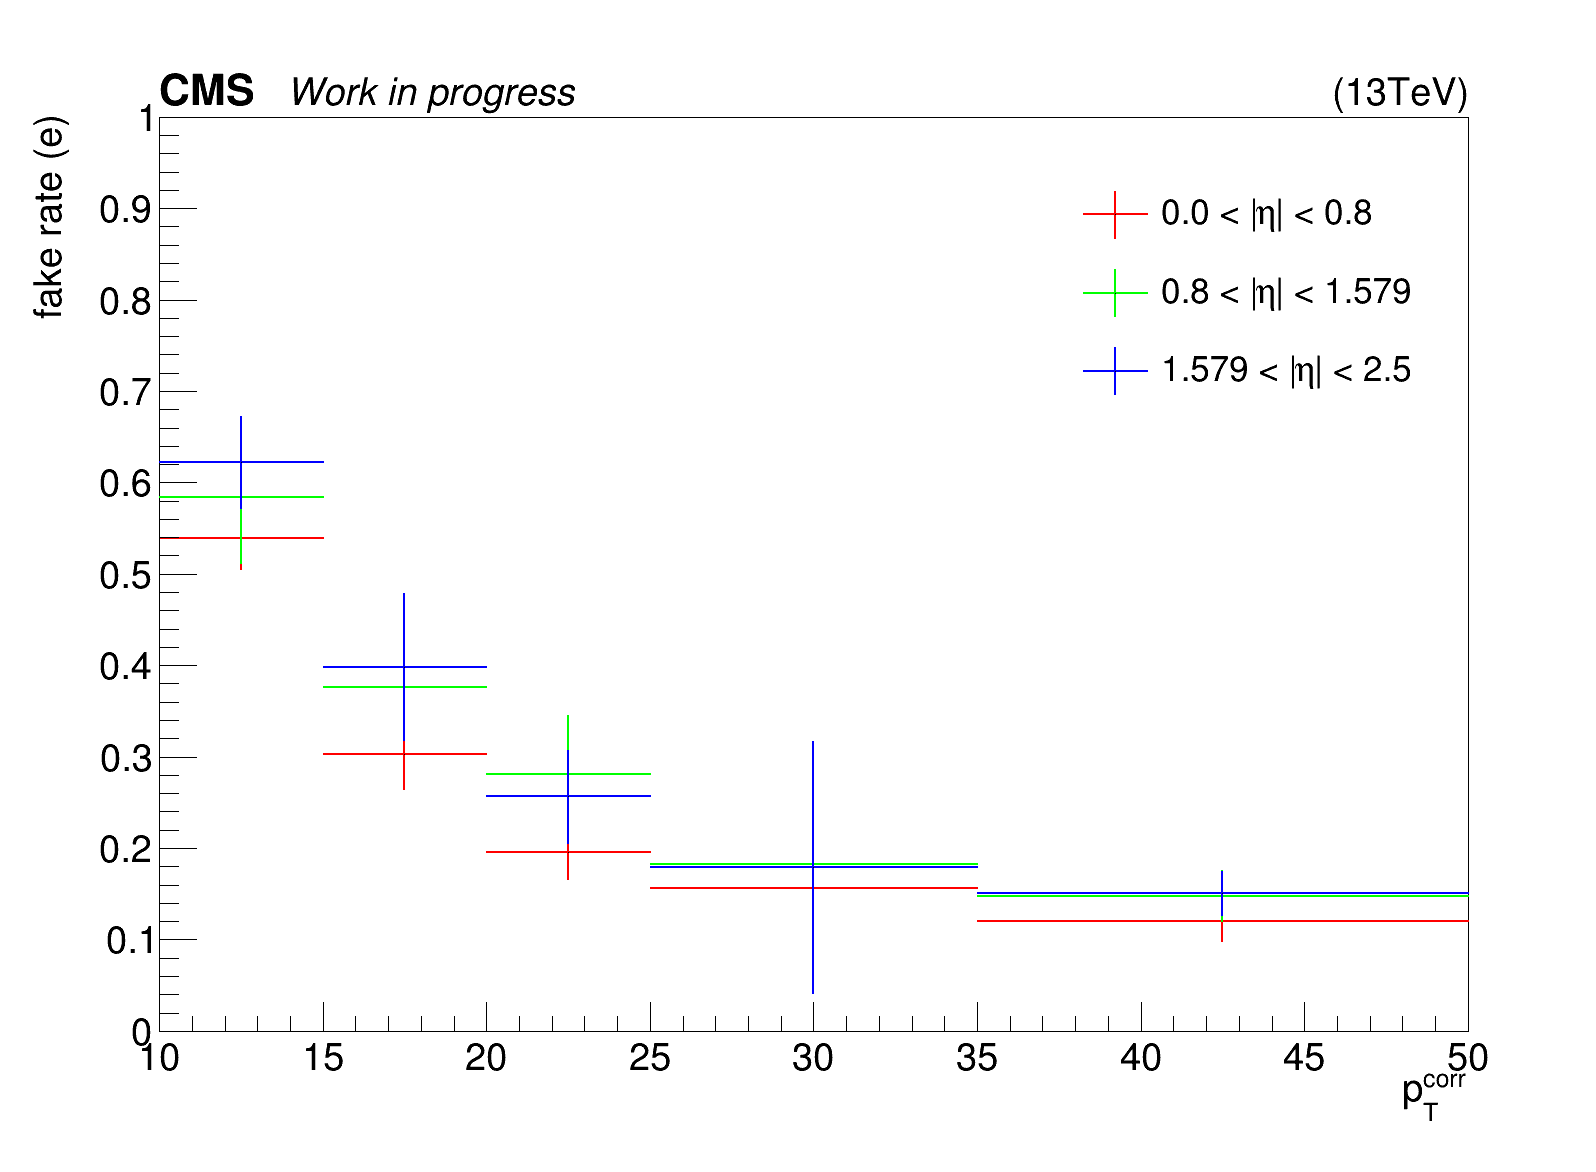

In [15]:
canvas.cd()
projections["eta1"].Draw()
projections["eta2"].Draw("same")
projections["eta3"].Draw("same")
legend.Draw("same")

text = ROOT.TLatex()
setInfoTo(text); text.DrawLatexNDC(0.835, 0.91, "(13TeV)")
setLogoTo(text); text.DrawLatexNDC(0.1, 0.91, "CMS")
setWorkInProgressTo(text); text.DrawLatexNDC(0.18, 0.91, "Work in progress")
if isQCD:
    setExtraInfoTo(text); text.DrawLatexNDC(0.15, 0.83, "measured in QCD MC")


canvas.Draw()